In [1]:
import pandas as pd
df = pd.read_csv("lightcast_job_postings.csv")
print(df.columns.tolist())


['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 'NAICS5_NAME', 'NAICS6', 'NAIC

In [2]:
import pandas as pd 
df = pd.read_csv("lightcast_job_postings.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Columns: 131 entries, ID to NAICS_2022_6_NAME
dtypes: bool(2), float64(11), int64(27), object(91)
memory usage: 71.5+ MB


ID LAST_UPDATED_DATE  \
0  1f57d95acf4dc67ed2819eb12f049f6a5c11782c        2024-09-06   
1  0cb072af26757b6c4ea9464472a50a443af681ac        2024-08-02   
2  85318b12b3331fa490d32ad014379df01855c557        2024-09-06   
3  1b5c3941e54a1889ef4f8ae55b401a550708a310        2024-09-06   
4  cb5ca25f02bdf25c13edfede7931508bfd9e858f        2024-06-19   

      LAST_UPDATED_TIMESTAMP  DUPLICATES      POSTED     EXPIRED  DURATION  \
0  2024-09-06 20:32:57.352 Z           0  2024-06-02  2024-06-08       6.0   
1  2024-08-02 17:08:58.838 Z           0  2024-06-02  2024-08-01       NaN   
2  2024-09-06 20:32:57.352 Z           1  2024-06-02  2024-07-07      35.0   
3  2024-09-06 20:32:57.352 Z           1  2024-06-02  2024-07-20      48.0   
4  2024-06-19 07:00:00.000 Z           0  2024-06-02  2024-06-17      15.0   

             SOURCE_TYPES                                        SOURCES  \
0       [\n  "Company"\n]                        [\n  "brassring.com"\n]   
1     [\n  "Job Board"\n]                            [\n  "maine.gov"\n]   
2     [\n  "Job Board"\n]                           [\n  "dejobs.org"\n]   
3     [\n  "Job Board"\n]  [\n  "disabledperson.com",\n  "dejobs.org"\n]   
4  [\n  "FreeJobBoard"\n]                       [\n  "craigslist.org"\n]   

                                                 URL  ... NAICS_2022_2  \
0  [\n  "https://sjobs.brassring.com/TGnewUI/Sear...  ...           44   
1   [\n  "https://joblink.maine.gov/jobs/1085740"\n]  ...           56   
2  [\n  "https://dejobs.org/dallas-tx/data-analys...  ...           52   
3  [\n  "https://www.disabledperson.com/jobs/5948...  ...           52   
4  [\n  "https://modesto.craigslist.org/sls/77475...  ...           99   

                                   NAICS_2022_2_NAME NAICS_2022_3  \
0                                       Retail Trade          441   
1  Administrative and Support and Waste Managemen...          561   
2                              Finance and Insurance          524   
3                              Finance and Insurance          522   
4                              Unclassified Industry          999   

                              NAICS_2022_3_NAME NAICS_2022_4  \
0               Motor Vehicle and Parts Dealers         4413   
1           Administrative and Support Services         5613   
2     Insurance Carriers and Related Activities         5242   
3  Credit Intermediation and Related Activities         5221   
4                         Unclassified Industry         9999   

                                   NAICS_2022_4_NAME  NAICS_2022_5  \
0  Automotive Parts, Accessories, and Tire Retailers         44133   
1                                Employment Services         56132   
2  Agencies, Brokerages, and Other Insurance Rela...         52429   
3                   Depository Credit Intermediation         52211   
4                              Unclassified Industry         99999   

                            NAICS_2022_5_NAME NAICS_2022_6  \
0  Automotive Parts and Accessories Retailers       441330   
1                     Temporary Help Services       561320   
2          Other Insurance Related Activities       524291   
3                          Commercial Banking       522110   
4                       Unclassified Industry       999999   

                            NAICS_2022_6_NAME  
0  Automotive Parts and Accessories Retailers  
1                     Temporary Help Services  
2                            Claims Adjusting  
3                          Commercial Banking  
4                       Unclassified Industry  

[5 rows x 131 columns]

In [3]:
import plotly.io as pio
pio.templates.default = 'plotly_white'

### Salary Distribution (Box Plot & Histogram)

In [4]:
import plotly.express as px

fig_box = px.box(df, y='SALARY', points='all', title='Salary Distribution Box Plot')
fig_box.show()

fig_hist = px.histogram(df, x='SALARY', nbins=50, title='Salary Distribution Histogram')
fig_hist.show()

### Top Industries with Most Job Postings

In [5]:
top_industries = df['NAICS2_NAME'].value_counts().nlargest(20)

fig_ind = px.bar(top_industries, 
                 x=top_industries.index, y=top_industries.values,
                 labels={'x': 'NAICS2_NAME', 'y': 'Number of Postings'},
                 title='Top 20 Industries with Most Job Postings')
fig_ind.update_layout(xaxis_tickangle=-45)
fig_ind.show()

### Remote vs On-site Job Distribution

In [6]:
df['REMOTE_TYPE_NAME'] = df['REMOTE_TYPE_NAME'].fillna('On-Site')

fig_remote = px.pie(df, names='REMOTE_TYPE_NAME', title='Remote vs On-site Job Distribution')
fig_remote.show()

In [7]:
selected_columns = df[['TITLE', 'SALARY', 'SALARY_FROM', 'SALARY_TO', 'SKILLS']]
print(selected_columns.head())
selected_columns.to_csv('Extracted_data.csv', index=False)

                TITLE   SALARY  SALARY_FROM  SALARY_TO  \
0  ET29C073C03D1F86B4      NaN          NaN        NaN   
1  ET21DDA63780A7DC09      NaN          NaN        NaN   
2  ET3037E0C947A02404      NaN          NaN        NaN   
3  ET2114E0404BA30075      NaN          NaN        NaN   
4  ET0000000000000000  92500.0      35000.0   150000.0   

                                              SKILLS  
0  [\n  "KS126DB6T061MHD7RTGQ",\n  "KS126706DPFD3...  
1  [\n  "KS122626T550SLQ7QZ1C",\n  "KS123YJ6KVWC9...  
2  [\n  "KS1218W78FGVPVP2KXPX",\n  "ESF3939CE1F80...  
3  [\n  "KS123QX62QYTC4JF38H8",\n  "KS7G6NP6R6L1H...  
4                                                 []  


In [8]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_data = missing_data[missing_data["Missing Values"] > 0]

missing_data = missing_data.sort_values(by="Percentage", ascending=False)


salary_median = df["SALARY"].median()

df["SALARY"].fillna(salary_median, inplace=True)

print("Missing values in SALARY after filling:", df["SALARY"].isnull().sum())

date_columns = ["LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "POSTED", "EXPIRED"]

for col in date_columns:
    if col in df.columns:  
        df[col] = pd.to_datetime(df[col], errors="coerce", utc=True) 

print(df[["LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "POSTED", "EXPIRED"]].head(10))

Missing values in SALARY after filling: 0
          LAST_UPDATED_DATE           LAST_UPDATED_TIMESTAMP  \
0 2024-09-06 00:00:00+00:00 2024-09-06 20:32:57.352000+00:00   
1 2024-08-02 00:00:00+00:00 2024-08-02 17:08:58.838000+00:00   
2 2024-09-06 00:00:00+00:00 2024-09-06 20:32:57.352000+00:00   
3 2024-09-06 00:00:00+00:00 2024-09-06 20:32:57.352000+00:00   
4 2024-06-19 00:00:00+00:00        2024-06-19 07:00:00+00:00   
5 2024-09-06 00:00:00+00:00 2024-09-06 20:32:57.352000+00:00   
6 2024-08-02 00:00:00+00:00 2024-08-02 17:08:58.838000+00:00   
7 2024-09-06 00:00:00+00:00 2024-09-06 20:32:57.352000+00:00   
8 2024-06-21 00:00:00+00:00        2024-06-21 07:00:00+00:00   
9 2024-10-09 00:00:00+00:00 2024-10-09 18:07:44.758000+00:00   

                     POSTED                   EXPIRED  
0 2024-06-02 00:00:00+00:00 2024-06-08 00:00:00+00:00  
1 2024-06-02 00:00:00+00:00 2024-08-01 00:00:00+00:00  
2 2024-06-02 00:00:00+00:00 2024-07-07 00:00:00+00:00  
3 2024-06-02 00:00:00+00:00 2

C:\Users\ch625\AppData\Local\Temp\ipykernel_7124\1041197890.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





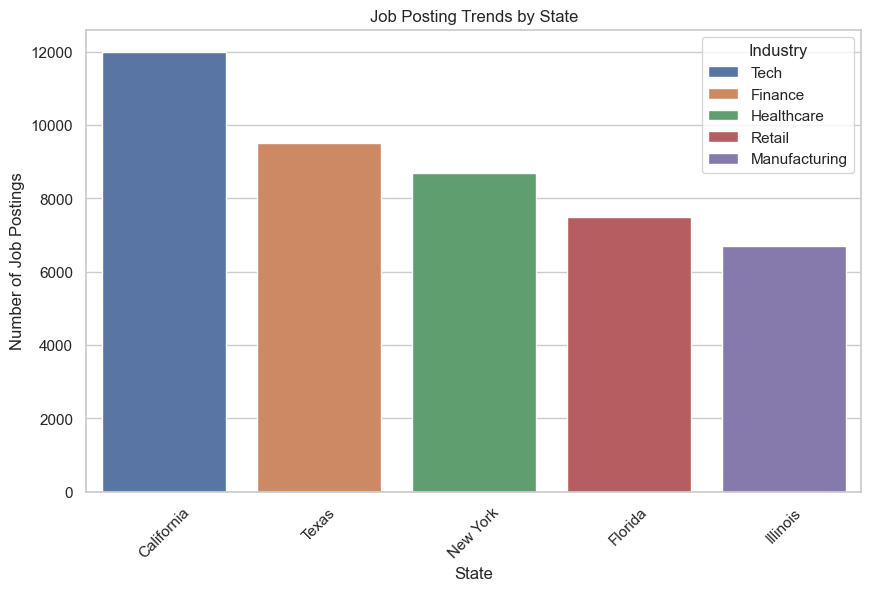

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data (simulating original dataset)
data = {
    "STATE_NAME": ["California", "Texas", "New York", "Florida", "Illinois"],
    "JOB_POSTINGS": [12000, 9500, 8700, 7500, 6700],
    "REMOTE_JOBS": [4500, 3800, 3200, 2900, 2500],
    "SALARY_FROM": [60000, 55000, 58000, 53000, 52000],
    "SALARY_TO": [120000, 110000, 115000, 105000, 100000],
    "INDUSTRY": ["Tech", "Finance", "Healthcare", "Retail", "Manufacturing"]
}

df = pd.DataFrame(data)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 1. Job Posting Trends (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x="STATE_NAME", y="JOB_POSTINGS", hue="INDUSTRY", data=df)
plt.title("Job Posting Trends by State")
plt.xlabel("State")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.legend(title="Industry")
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset from local file
file_path = "lightcast_job_postings.csv"  # 确保文件在当前工作目录，或填写完整路径
df = pd.read_csv(file_path)

# Inspect the first few rows to verify the data structure
print(df.head())

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 1. Job Posting Trends (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x="STATE_NAME", y="POSTED", hue="INDUSTRY", data=df)
plt.title("Job Posting Trends by State")
plt.xlabel("State")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.legend(title="Industry")
plt.show()

                                         ID LAST_UPDATED_DATE  \
0  1f57d95acf4dc67ed2819eb12f049f6a5c11782c        2024-09-06   
1  0cb072af26757b6c4ea9464472a50a443af681ac        2024-08-02   
2  85318b12b3331fa490d32ad014379df01855c557        2024-09-06   
3  1b5c3941e54a1889ef4f8ae55b401a550708a310        2024-09-06   
4  cb5ca25f02bdf25c13edfede7931508bfd9e858f        2024-06-19   

      LAST_UPDATED_TIMESTAMP  DUPLICATES      POSTED     EXPIRED  DURATION  \
0  2024-09-06 20:32:57.352 Z           0  2024-06-02  2024-06-08       6.0   
1  2024-08-02 17:08:58.838 Z           0  2024-06-02  2024-08-01       NaN   
2  2024-09-06 20:32:57.352 Z           1  2024-06-02  2024-07-07      35.0   
3  2024-09-06 20:32:57.352 Z           1  2024-06-02  2024-07-20      48.0   
4  2024-06-19 07:00:00.000 Z           0  2024-06-02  2024-06-17      15.0   

             SOURCE_TYPES                                        SOURCES  \
0       [\n  "Company"\n]                        [\n  "brassring

ValueError: Could not interpret value `INDUSTRY` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

C:\Users\ch625\AppData\Local\Temp\ipykernel_11400\3708161179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STATE_NAME", y="TITLE_NAME", data=state_job_counts, palette="viridis")


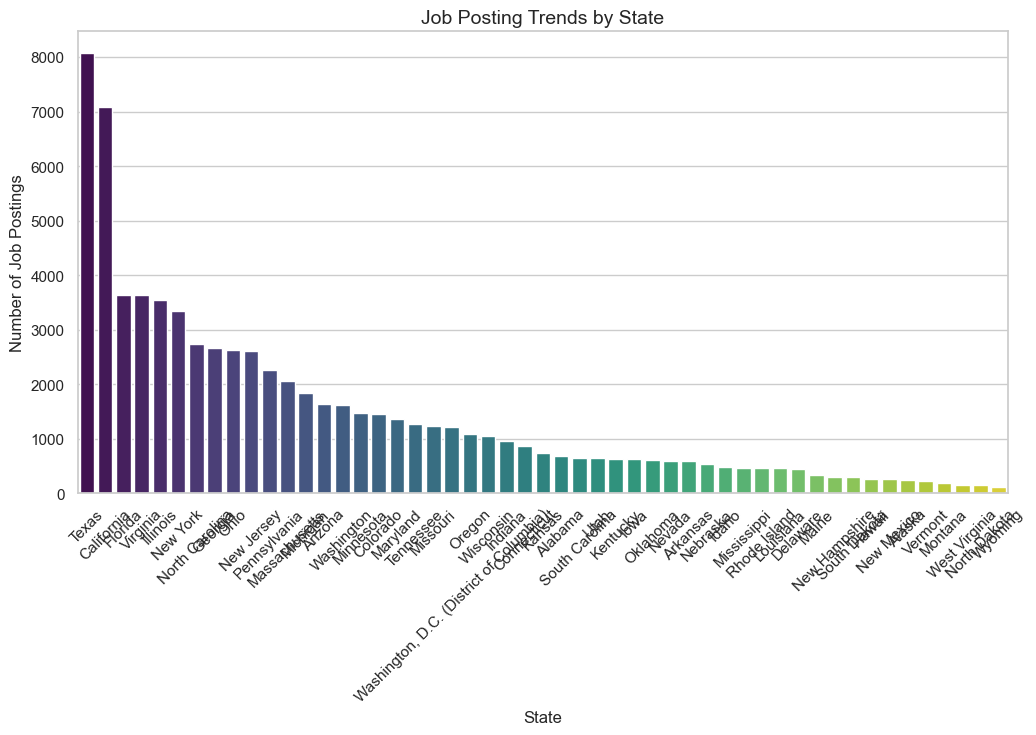

In [ ]:
state_job_counts = df.groupby("STATE_NAME")["TITLE_NAME"].count().reset_index()
state_job_counts = state_job_counts.sort_values(by="TITLE_NAME", ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="STATE_NAME", y="TITLE_NAME", data=state_job_counts, palette="viridis")

plt.title("Job Posting Trends by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

C:\Users\ch625\AppData\Local\Temp\ipykernel_11400\1584174182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STATE_NAME", y="TITLE_NAME", data=state_job_counts, palette="viridis")


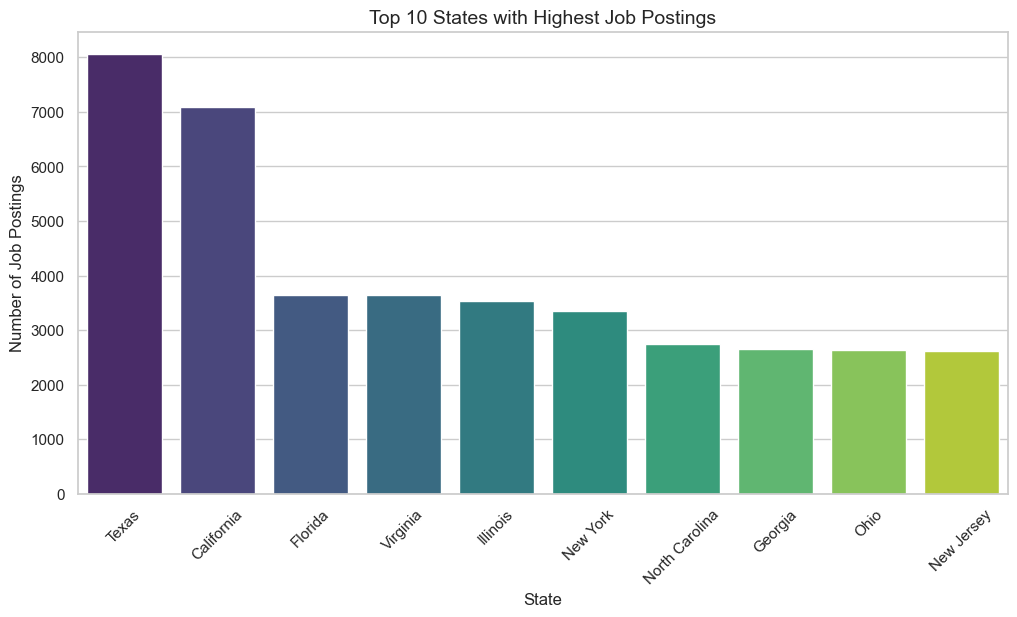

In [ ]:
state_job_counts = df.groupby("STATE_NAME")["TITLE_NAME"].count().reset_index()
state_job_counts = state_job_counts.sort_values(by="TITLE_NAME", ascending=False).head(10) 
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="STATE_NAME", y="TITLE_NAME", data=state_job_counts, palette="viridis")

plt.title("Top 10 States with Highest Job Postings", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

C:\Users\ch625\AppData\Local\Temp\ipykernel_11400\3675328489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NAICS2_NAME", y="TITLE_NAME", data=industry_job_counts, palette="coolwarm")


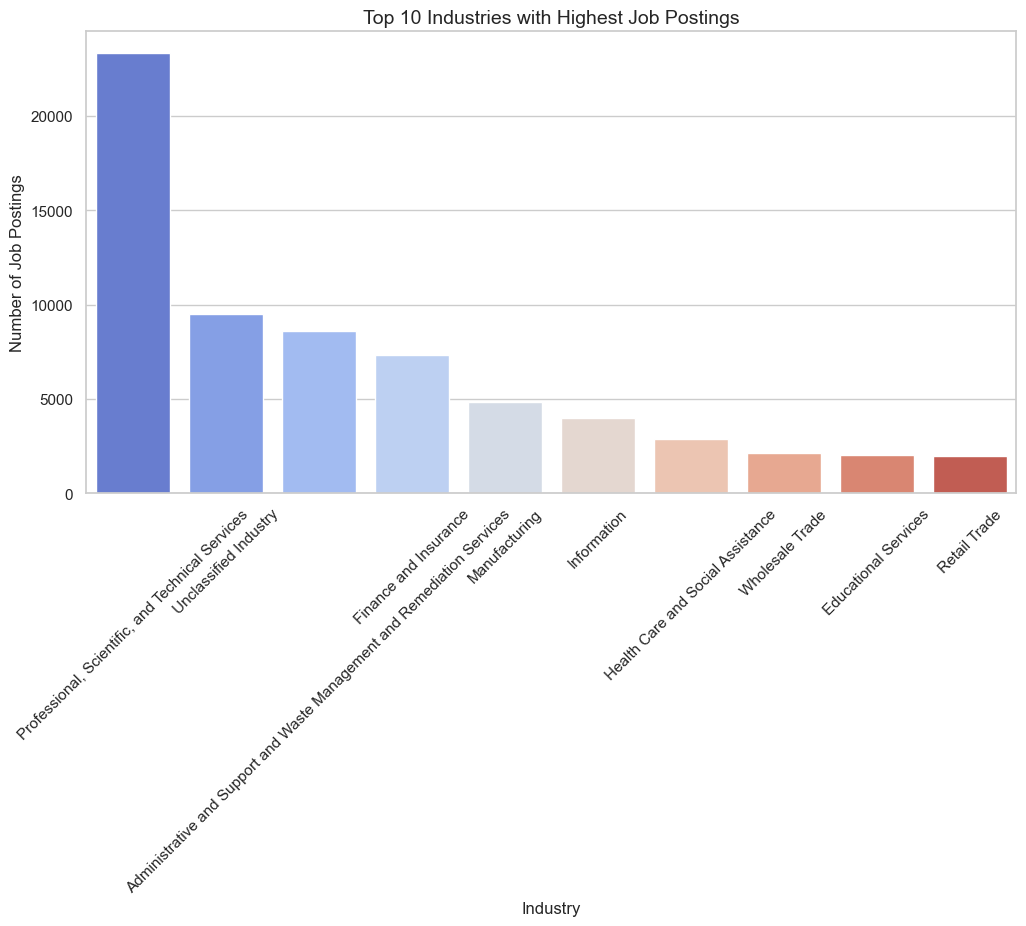

In [ ]:
industry_job_counts = df.groupby("NAICS2_NAME")["TITLE_NAME"].count().reset_index()
industry_job_counts = industry_job_counts.sort_values(by="TITLE_NAME", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="NAICS2_NAME", y="TITLE_NAME", data=industry_job_counts, palette="coolwarm")

plt.title("Top 10 Industries with Highest Job Postings", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45)
plt.show()

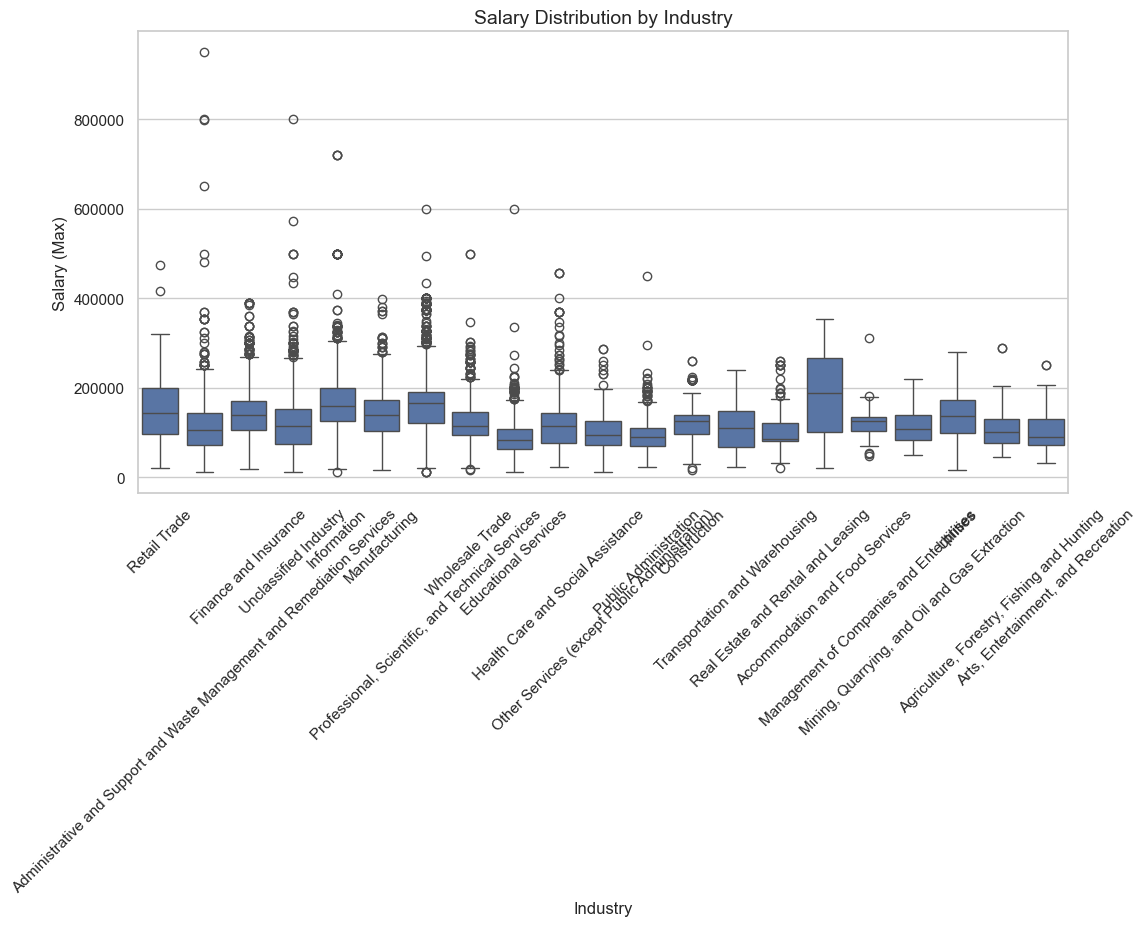

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="NAICS2_NAME", y="SALARY_TO", data=df)
plt.title("Salary Distribution by Industry", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Salary (Max)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

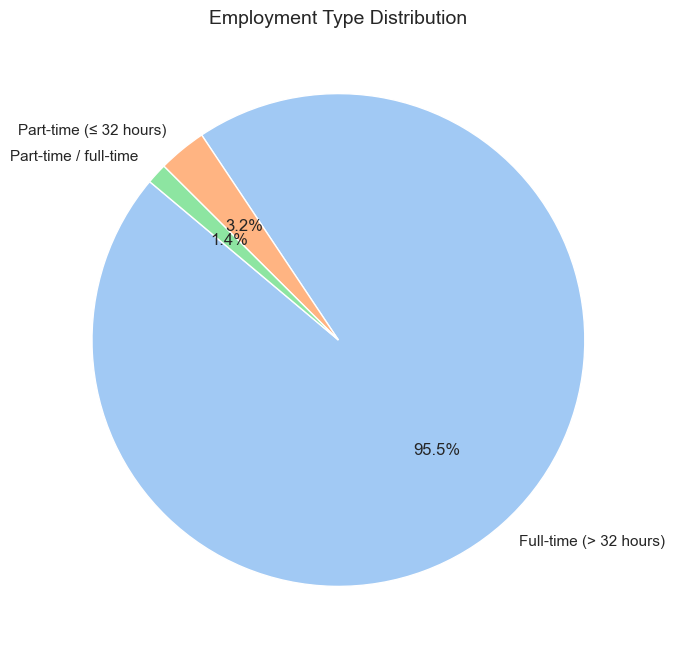

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设 df 是你已经加载的 DataFrame
if "EMPLOYMENT_TYPE_NAME" in df.columns:
    employment_counts = df["EMPLOYMENT_TYPE_NAME"].value_counts().reset_index()
    employment_counts.columns = ["Employment Type", "Count"]

    plt.figure(figsize=(8, 8))
    plt.pie(employment_counts["Count"], labels=employment_counts["Employment Type"], autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Employment Type Distribution", fontsize=14)
    plt.show()
else:
    print("Error: Column 'EMPLOYMENT_TYPE_NAME' not found in the dataset.")



In [ ]:
import plotly.express as px
import pandas as pd

file_path = "lightcast_job_postings.csv"  
df = pd.read_csv(file_path)
city_counts = df['CITY_NAME'].value_counts().reset_index()
city_counts.columns = ['CITY_NAME', 'Job Count']


fig = px.scatter_geo(city_counts,
                     locations="CITY_NAME",
                     locationmode="USA-states",
                     size="Job Count",
                     title="Job Postings Distribution Across Cities",
                     projection="natural earth")
fig.show()

In [ ]:
import plotly.express as px

df_salary = df[(df['SALARY_FROM'] > 0) & (df['SALARY_TO'] > 0)]

fig = px.histogram(df_salary, x="SALARY_FROM", nbins=50, title="Interactive Salary Distribution",
                   labels={"SALARY_FROM": "Salary Lower Bound"},
                   color_discrete_sequence=["blue"])
fig.update_layout(xaxis_title="Salary", yaxis_title="Frequency", dragmode="pan")
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import Nominatim
print("Geopy is successfully installed!")



city_counts = df['CITY_NAME'].value_counts().reset_index()
city_counts.columns = ['CITY_NAME', 'Job Count']

geolocator = Nominatim(user_agent="geoapiExercises")

def get_lat_lon(city):
    try:
        location = geolocator.geocode(city + ", USA")
        if location:
            return pd.Series([location.latitude, location.longitude])
    except:
        return pd.Series([None, None])

city_counts[['Latitude', 'Longitude']] = city_counts['CITY_NAME'].apply(get_lat_lon)

city_counts.dropna(inplace=True)

fig = px.scatter_geo(city_counts, 
                     lat="Latitude", 
                     lon="Longitude", 
                     size="Job Count", 
                     hover_name="CITY_NAME",
                     title="Job Postings Distribution Across Cities",
                     projection="natural earth")

fig.update_layout(geo=dict(showcoastlines=True))
fig.show()

Geopy is successfully installed!


In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px


st.title("Job Market Analysis")

job_title = st.selectbox("Select a Job Title", df['TITLE_NAME'].unique())

filtered_df = df[df['TITLE_NAME'] == job_title]

fig = px.histogram(filtered_df, x="SALARY_FROM", nbins=30, title=f"Salary Distribution for {job_title}")
st.plotly_chart(fig)

2025-02-17 18:10:20.415 
  command:

    streamlit run c:\Users\ch625\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-17 18:10:20.432 Session state does not function when running a script without `streamlit run`


DeltaGenerator()